# Topic modelling of Lenovo mobile reviews (LDA)

In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
import pandas as pd

In [48]:
columns_to_drop = ['date', 'developerResponse', 'rating', 'isEdited', 'title', 'userName', 'Unnamed: 0']
review_data = pd.read_csv('data/AppStoreData.csv').drop(columns_to_drop,axis=1)
review_data.head()

,review
0,Great banking app with attractive interest rat...
1,"A bank like no other, no bank have such amazin..."
2,Notice that the drop in interest rate of 0.8% ...
3,Sending money into my GXS account is a breeze ...
4,I have to say that the UI/UX is one of the bes...


In [49]:
review_data = pd.read_csv('data/K8 Reviews v0.2.csv').drop('sentiment',axis=1)
review_data.head()

,review
0,Good but need updates and improvements
1,"Worst mobile i have bought ever, Battery is dr..."
2,when I will get my 10% cash back.... its alrea...
3,Good
4,The worst phone everThey have changed the last...


In [85]:
columns_to_drop = ['date', 'developerResponse', 'rating', 'isEdited', 'title', 'userName', 'Unnamed: 0']
review_data = pd.read_csv('data/AppStoreData.csv').drop(columns_to_drop,axis=1)
review_data.head()

,review
0,Great banking app with attractive interest rat...
1,"A bank like no other, no bank have such amazin..."
2,Notice that the drop in interest rate of 0.8% ...
3,Sending money into my GXS account is a breeze ...
4,I have to say that the UI/UX is one of the bes...


In [86]:
review_data.shape

# We have 14K reviews 

(130, 1)

# Data Pre-Processing
### 1. Replacing/Dropping NULL values

In [87]:
review_data.isnull().sum()

# Since our data has no null values will be skip this step

review    0
dtype: int64

### 2. Converting to LOWER case

In [88]:
review_data['clean_review'] = review_data['review'].apply(lambda x: str(x).lower())
review_data.head()

,review,clean_review
0,Great banking app with attractive interest rat...,great banking app with attractive interest rat...
1,"A bank like no other, no bank have such amazin...","a bank like no other, no bank have such amazin..."
2,Notice that the drop in interest rate of 0.8% ...,notice that the drop in interest rate of 0.8% ...
3,Sending money into my GXS account is a breeze ...,sending money into my gxs account is a breeze ...
4,I have to say that the UI/UX is one of the bes...,i have to say that the ui/ux is one of the bes...


### 3. REMOVE NON-ALPHA DATA(DIGITS,PUNCTUATIONS,DIACRITICS)

In [89]:
review_data['clean_review'] = review_data['clean_review'].str.replace(r'[^a-zA-Z\s]', ' ',regex=True) 
review_data.head()

,review,clean_review
0,Great banking app with attractive interest rat...,great banking app with attractive interest rat...
1,"A bank like no other, no bank have such amazin...",a bank like no other no bank have such amazin...
2,Notice that the drop in interest rate of 0.8% ...,notice that the drop in interest rate of ...
3,Sending money into my GXS account is a breeze ...,sending money into my gxs account is a breeze ...
4,I have to say that the UI/UX is one of the bes...,i have to say that the ui ux is one of the bes...


### 4. REMOVING WHITE SPACE

In [90]:
review_data['clean_review'] = review_data['clean_review'].str.replace(r'\s{2,}', ' ',regex=True)
review_data.head()

,review,clean_review
0,Great banking app with attractive interest rat...,great banking app with attractive interest rat...
1,"A bank like no other, no bank have such amazin...",a bank like no other no bank have such amazing...
2,Notice that the drop in interest rate of 0.8% ...,notice that the drop in interest rate of in sa...
3,Sending money into my GXS account is a breeze ...,sending money into my gxs account is a breeze ...
4,I have to say that the UI/UX is one of the bes...,i have to say that the ui ux is one of the bes...


### 5. WORD TOKENIZATION

In [91]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/neleht./nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [92]:
review_data['clean_review'] = review_data['clean_review'].apply(lambda x: word_tokenize(x))
review_data.head()

,review,clean_review
0,Great banking app with attractive interest rat...,"[great, banking, app, with, attractive, intere..."
1,"A bank like no other, no bank have such amazin...","[a, bank, like, no, other, no, bank, have, suc..."
2,Notice that the drop in interest rate of 0.8% ...,"[notice, that, the, drop, in, interest, rate, ..."
3,Sending money into my GXS account is a breeze ...,"[sending, money, into, my, gxs, account, is, a..."
4,I have to say that the UI/UX is one of the bes...,"[i, have, to, say, that, the, ui, ux, is, one,..."


### 6. REMOVE UNNECESSARY WORDS

In [93]:
!pip install stopwords

In [94]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/neleht./nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [95]:
review_data['clean_review'] = review_data['clean_review'].apply\
(lambda x:[word for word in x if word not in stopwords.words("english") and len(word) > 3 and word.isalpha()])
review_data.head()


,review,clean_review
0,Great banking app with attractive interest rat...,"[great, banking, attractive, interest, rates, ..."
1,"A bank like no other, no bank have such amazin...","[bank, like, bank, amazing, feature, separate,..."
2,Notice that the drop in interest rate of 0.8% ...,"[notice, drop, interest, rate, saving, account..."
3,Sending money into my GXS account is a breeze ...,"[sending, money, account, breeze, instantaneou..."
4,I have to say that the UI/UX is one of the bes...,"[best, seen, digibank, mobile, finally, strong..."


In [96]:
review_data = review_data[review_data['clean_review'].map(lambda x: len(x)) > 1].reset_index(drop=True)
# Keeping records with more than single words

### 7. LEMMATIZATION

In [97]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/neleht./nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [98]:
review_data['clean_review'] = review_data['clean_review'].apply\
(lambda x: [WordNetLemmatizer().lemmatize(word) for word in x])
review_data.head()

,review,clean_review
0,Great banking app with attractive interest rat...,"[great, banking, attractive, interest, rate, p..."
1,"A bank like no other, no bank have such amazin...","[bank, like, bank, amazing, feature, separate,..."
2,Notice that the drop in interest rate of 0.8% ...,"[notice, drop, interest, rate, saving, account..."
3,Sending money into my GXS account is a breeze ...,"[sending, money, account, breeze, instantaneou..."
4,I have to say that the UI/UX is one of the bes...,"[best, seen, digibank, mobile, finally, strong..."


### 8. Extracting only NOUN

In [99]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/neleht./nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [100]:
review_data['clean_review'] = review_data['clean_review'].apply\
(lambda x: [word for word in x if nltk.pos_tag([word])[0][1] == 'NN'])

In [101]:
review_data = review_data[review_data['clean_review'].map(lambda x: len(x)) > 1].reset_index(drop=True)
# Keeping records with more than single words

In [102]:
review_data.head()

,review,clean_review
0,Great banking app with attractive interest rat...,"[banking, interest, rate, please, payee, numbe..."
1,"A bank like no other, no bank have such amazin...","[bank, bank, feature, money, pocket, track, go..."
2,Notice that the drop in interest rate of 0.8% ...,"[notice, drop, interest, rate, account, reason..."
3,Sending money into my GXS account is a breeze ...,"[money, account, breeze, amount, fund, money, ..."
4,I have to say that the UI/UX is one of the bes...,"[digibank, mobile, market, player, focus, cust..."


### 9. Document Term Matrix

In [103]:
import gensim
from gensim import corpora

In [104]:
dictionary = corpora.Dictionary(review_data['clean_review'])
print(dictionary)

# We have 6724 unique tokens

Dictionary(366 unique tokens: ['account', 'apple', 'banking', 'card', 'debit']...)


In [105]:
doc_term_matrix = review_data['clean_review'].apply(lambda x: dictionary.doc2bow(x))
doc_term_matrix[:10]

# Each tokenized words has been assigned index value and thier count in corpus

0    [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1...
1    [(5, 3), (9, 1), (10, 3), (11, 1), (12, 1), (1...
2    [(0, 9), (5, 7), (9, 6), (10, 1), (34, 1), (35...
3    [(0, 2), (2, 1), (8, 1), (23, 2), (30, 1), (43...
4    [(2, 1), (8, 1), (10, 1), (26, 1), (33, 1), (6...
5    [(0, 1), (10, 4), (42, 1), (61, 1), (83, 1), (...
6    [(2, 1), (5, 1), (9, 1), (10, 1), (32, 1), (74...
7    [(2, 1), (7, 1), (10, 3), (17, 1), (23, 1), (3...
8    [(17, 1), (25, 1), (32, 1), (33, 1), (74, 1), ...
9    [(0, 2), (6, 1), (8, 1), (10, 3), (21, 1), (56...
Name: clean_review, dtype: object

### LDA

In [106]:
from IPython.display import clear_output

In [107]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(corpus=doc_term_matrix, num_topics=12, id2word=dictionary, passes=10,random_state=45)
clear_output()

# corpus requires document term matrix
# num_topics is used to define number of topics to create from corpus
# id2word requires mapping of words
# passes is used to define number of iterations

In [108]:
ldamodel.print_topics()

# We have printed all 12 topics and their keywords generated by LDA

[(0,
  '0.040*"experience" + 0.040*"digital" + 0.040*"bank" + 0.027*"fund" + 0.027*"interest" + 0.027*"account" + 0.027*"offer" + 0.014*"access" + 0.014*"banking" + 0.014*"singtel"'),
 (1,
  '0.075*"wait" + 0.046*"write" + 0.031*"rate" + 0.031*"phone" + 0.031*"problem" + 0.016*"told" + 0.016*"grab" + 0.016*"dark" + 0.016*"staff" + 0.016*"risk"'),
 (2,
  '0.043*"bank" + 0.029*"account" + 0.029*"money" + 0.029*"repayment" + 0.022*"transfer" + 0.022*"trust" + 0.022*"time" + 0.015*"ease" + 0.015*"singapore" + 0.015*"grab"'),
 (3,
  '0.060*"user" + 0.037*"design" + 0.025*"service" + 0.025*"navigate" + 0.025*"device" + 0.025*"pocket" + 0.025*"grow" + 0.025*"money" + 0.024*"experience" + 0.013*"lack"'),
 (4,
  '0.117*"interest" + 0.101*"pocket" + 0.071*"rate" + 0.054*"love" + 0.029*"money" + 0.027*"feature" + 0.027*"bank" + 0.027*"wait" + 0.025*"user" + 0.022*"goal"'),
 (5,
  '0.050*"user" + 0.050*"something" + 0.026*"singpass" + 0.026*"information" + 0.013*"interest" + 0.013*"rate" + 0.013*"

### Visualizing LDA model topics

In [109]:
import pyLDAvis # To visualize lda model
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel,doc_term_matrix,dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.101591  0.093240       1        1  21.220972
2      0.104093 -0.032473       2        1  13.000833
4     -0.137718  0.165343       3        1  10.697922
10     0.123153  0.060680       4        1   9.242775
11     0.081004  0.028750       5        1   8.601844
6     -0.080163 -0.060060       6        1   6.456987
5     -0.043338 -0.056240       7        1   6.142663
3     -0.116749  0.033875       8        1   6.039286
0      0.010449 -0.008979       9        1   5.656403
9     -0.012331 -0.045481      10        1   5.121168
1     -0.010476 -0.041313      11        1   4.702900
8     -0.019514 -0.137342      12        1   3.116247, topic_info=         Term       Freq      Total Category  logprob  loglift
25     pocket  11.000000  11.000000  Default  30.0000  30.0000
5    interest  24.000000  24.000000  Default  29.0000  29.0000
33       wait   9.000000   9.000000  Default  28.0000  28.0000
0     account  25.000000  25.000000  Default  27.0000  27.0000
9        rate  17.000000  17.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
119     touch   0.042167   2.805792  Topic12  -6.4393  -0.7293
69       time   0.042272  10.047532  Topic12  -6.4368  -2.0024
23      money   0.042223  13.053996  Topic12  -6.4379  -2.2653
30   transfer   0.042196   8.042109  Topic12  -6.4386  -1.7816
7       payee   0.042113   5.940866  Topic12  -6.4405  -1.4807

[530 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
168       8  0.776597   abrupt
284       1  0.665405   accept
344       4  0.494574   access
344       9  0.494574   access
0         1  0.509185  account
...     ...       ...      ...
312       1  0.251342    write
312       3  0.251342    write
312      11  0.502684    write
146       2  0.466996     year
146       5  0.466996     year

[565 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 3, 5, 11, 12, 7, 6, 4, 1, 10, 2, 9])

Since, some topics in above graph are overlapping each other we will try to find optimal number of topics.

In [110]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=ldamodel,texts=review_data['clean_review'],\
                                     dictionary=dictionary , coherence='c_v')
print('\nCoherence Score: ', coherence_model_lda.get_coherence())

# Compute Coherence Score


Coherence Score:  0.4100970154148364


In [111]:
# Computing coherence score for different size of topic

def calculate_topic_cv(ldamodel,texts,dictionary,topic_range):
  cv_score =[]
  topic_num = []
  for i in range(2,topic_range):
    topic_num.append(i)
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_term_matrix, num_topics=i, id2word=dictionary, passes=10,random_state=45)
    cv_score.append(CoherenceModel(model=ldamodel,texts=texts,\
                                   dictionary=dictionary , coherence='c_v').get_coherence())
    clear_output()
  return topic_num,cv_score

In [112]:
topic_num,cv_score = calculate_topic_cv(ldamodel,review_data['clean_review'],dictionary,15)

In [113]:
pd.DataFrame(zip(topic_num,cv_score),columns=['Topic','Coherence_Score']).set_index\
('Topic').sort_values('Coherence_Score',ascending=False)

,Coherence_Score
Topic,
10,0.464836
7,0.461642
14,0.447155
11,0.439995
8,0.439746
6,0.433380
3,0.420038
12,0.410097
9,0.406801


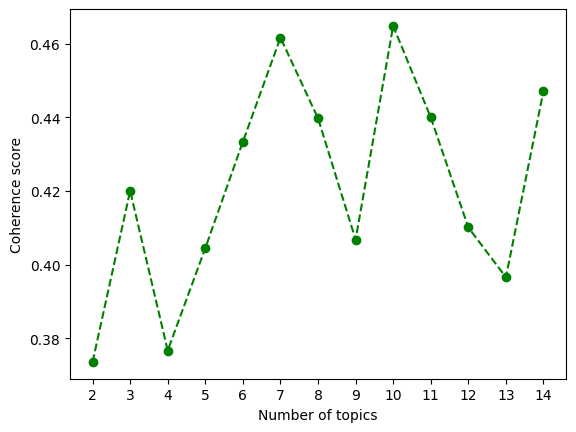

In [114]:
import matplotlib.pyplot as plt

plt.plot(topic_num,cv_score,color='green', marker='o', linestyle='dashed')
plt.xticks(range(2,15))
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')
plt.show()

### we will be going with number of topic 6 as with 8 topics there will be many overlaps .

In [159]:
# Creating LDA model with number of topics as 6

Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics=10, id2word=dictionary, passes=10,random_state=45)
clear_output()
print(CoherenceModel(model=ldamodel,texts=review_data['clean_review'],\
                     dictionary=dictionary , coherence='c_v').get_coherence())

0.46483550929388784


In [160]:
ldamodel.print_topics()

[(0,
  '0.055*"experience" + 0.047*"bank" + 0.037*"digital" + 0.033*"user" + 0.028*"service" + 0.019*"fast" + 0.019*"issue" + 0.019*"simple" + 0.019*"offer" + 0.019*"competitor"'),
 (1,
  '0.047*"write" + 0.032*"launch" + 0.031*"response" + 0.017*"build" + 0.017*"update" + 0.017*"please" + 0.017*"time" + 0.017*"store" + 0.017*"staff" + 0.017*"help"'),
 (2,
  '0.070*"bank" + 0.024*"fast" + 0.024*"review" + 0.024*"need" + 0.018*"repayment" + 0.018*"trust" + 0.018*"account" + 0.018*"time" + 0.018*"quick" + 0.018*"banking"'),
 (3,
  '0.047*"money" + 0.047*"pocket" + 0.038*"user" + 0.029*"time" + 0.020*"sign" + 0.020*"lack" + 0.020*"design" + 0.020*"move" + 0.020*"transfer" + 0.020*"device"'),
 (4,
  '0.106*"interest" + 0.068*"rate" + 0.058*"pocket" + 0.039*"bank" + 0.030*"love" + 0.015*"loan" + 0.015*"offer" + 0.015*"phone" + 0.015*"please" + 0.015*"problem"'),
 (5,
  '0.076*"account" + 0.038*"money" + 0.020*"time" + 0.020*"grab" + 0.020*"fund" + 0.020*"amount" + 0.020*"transfer" + 0.020*"

In [161]:
pyLDAvis.gensim.prepare(ldamodel,doc_term_matrix,dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.168374 -0.017833       1        1  28.305820
2     -0.039408  0.150092       2        1  15.514992
4     -0.090983 -0.114316       3        1  11.155598
5     -0.052229  0.023604       4        1   8.496547
0      0.035718  0.108912       5        1   8.475566
3      0.007878 -0.103495       6        1   8.261822
6      0.150936 -0.086831       7        1   7.841811
1      0.090160  0.040348       8        1   4.210184
9      0.021652 -0.006913       9        1   3.869403
8      0.044649  0.006431      10        1   3.868258, topic_info=          Term       Freq      Total Category  logprob  loglift
0      account  26.000000  26.000000  Default  30.0000  30.0000
5     interest  25.000000  25.000000  Default  29.0000  29.0000
25      pocket  10.000000  10.000000  Default  28.0000  28.0000
10        bank  31.000000  31.000000  Default  27.0000  27.0000
9         rate  17.000000  17.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
245  brilliant   0.049945   1.147665  Topic10  -6.4862   0.1178
10        bank   0.549377  31.177986  Topic10  -4.0883  -0.7863
25      pocket   0.049946  10.791273  Topic10  -6.4862  -2.1232
9         rate   0.049946  17.998910  Topic10  -6.4862  -2.6348
23       money   0.049946  12.991519  Topic10  -6.4862  -2.3088

[454 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
168       6  0.770172   abrupt
284       9  0.871334   accept
344       5  0.507635   access
0         1  0.688529  account
0         2  0.076503  account
...     ...       ...      ...
136       5  0.765098    worry
195       3  0.746868    worth
312       2  0.269096    write
312       3  0.269096    write
312       8  0.538192    write

[487 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 3, 5, 6, 1, 4, 7, 2, 10, 9])

In [162]:
review_data.head()

,review,clean_review,Topic_Number,Topic_Name
0,Great banking app with attractive interest rat...,"[banking, interest, rate, please, payee, numbe...",5,Pocket
1,"A bank like no other, no bank have such amazin...","[bank, bank, feature, money, pocket, track, go...",4,Interest rate & Loans
2,Notice that the drop in interest rate of 0.8% ...,"[notice, drop, interest, rate, account, reason...",5,Pocket
3,Sending money into my GXS account is a breeze ...,"[money, account, breeze, amount, fund, money, ...",5,Pocket
4,I have to say that the UI/UX is one of the bes...,"[digibank, mobile, market, player, focus, cust...",6,Money Growth


### Creating a lookup table for topics

In [181]:
topic_lookup_data = pd.DataFrame((ldamodel.print_topics()),columns=['Topic_Number','Top_Keywords'])

topic_lookup_data['Topic_Name'] = ['App Responsiveness','Money Growth (Interest Rates)','Customer Services','Services & Products','User Interface','Credit card usage', 'Login & Account Setup', 'Competition', 'Safety', 'Customer trust']

topic_lookup_data = topic_lookup_data[['Topic_Number','Topic_Name','Top_Keywords']]

topic_lookup_data['Top_Keywords'] =  {
    0: ['freeze', 'crash', 'buggy', 'open', 'Transaction', 'speed', 'fast', 'loading', 'crash', 'breeze', 'swift', 'rapid', 'seamless', 'smooth', 'wait', 'hassle', 'snappy', 'load', 'fingertips', 'efficient'],
    1: ['advertising', 'drop', 'daily', 'min', 'disbursement', 'ROI', 'interest', 'rates', 'savings', 'p.a.'],
    2: ['waiting', 'time', 'efficient', 'late', 'response', 'customer', 'support', 'hotline', 'email', 'feedback','suggestion'],
    3: ['application', 'depositing', 'repayment', 'loan', 'approval', 'pocket', 'biometrics', 'reject', 'approve', 'digital', 'money', 'transfer', 'payee', 'lucky', 'draw', 'saving', 'due', 'date', 'convenient', 'buzz', 'update', 'efficient', 'transparent', 'useless', 'block', 'mistake', 'inconvenience', 'safe', 'pocket', 'QR', 'deposit'],
    4: ['ease', 'use', 'easy', 'clear', 'friendly', 'seamless', 'functionality', 'icon', 'graphics', 'design', 'UI', 'UX', 'theme', 'UI/UX', 'error', 'interface', 'intuitive', 'user', 'beautiful'],
    5: ['rebates', 'rewards', 'programme', 'debit'],
    6: ['registration', 'singpass', 'password', 'error', 'biometric', 'onboard', 'form', 'length', 'set', 'up', 'login' , 'open', 'sign', 'fingerprint', 'launch', 'register', 'create', 'application', '2FA', 'download'],
    7: ['Trust', 'bank', 'maribank', 'T' , 'bills', 'OCBC', 'Timo', 'bank'],
    8: ['password', 'pin', 'particular', 'fill', 'up', 'QR', 'bug', 'hack', 'security', 'secure', 'insecure', 'misleading', 'deceive', 'fake' , 'false', 'scam'],
    9: ['misleading', 'decieving', 'fake', 'false', 'scam']
}

#topic_lookup_data['Top_Keywords'] = topic_lookup_data.Top_Keywords.str\
#.replace(r'[^a-z]',' ',regex=True).apply(lambda x: x.split())


topic_lookup_data.style.set_properties(subset=['Top_Keywords'], **{'width': '300px'})

,Topic_Number,Topic_Name,Top_Keywords
0,0,App Responsiveness,"['freeze', 'crash', 'buggy', 'open', 'Transaction', 'speed', 'fast', 'loading', 'crash', 'breeze', 'swift', 'rapid', 'seamless', 'smooth', 'wait', 'hassle', 'snappy', 'load', 'fingertips', 'efficient']"
1,1,Money Growth (Interest Rates),"['advertising', 'drop', 'daily', 'min', 'disbursement', 'ROI', 'interest', 'rates', 'savings', 'p.a.']"
2,2,Customer Services,"['waiting', 'time', 'efficient', 'late', 'response', 'customer', 'support', 'hotline', 'email', 'feedback', 'suggestion']"
3,3,Services & Products,"['application', 'depositing', 'repayment', 'loan', 'approval', 'pocket', 'biometrics', 'reject', 'approve', 'digital', 'money', 'transfer', 'payee', 'lucky', 'draw', 'saving', 'due', 'date', 'convenient', 'buzz', 'update', 'efficient', 'transparent', 'useless', 'block', 'mistake', 'inconvenience', 'safe', 'pocket', 'QR', 'deposit']"
4,4,User Interface,"['ease', 'use', 'easy', 'clear', 'friendly', 'seamless', 'functionality', 'icon', 'graphics', 'design', 'UI', 'UX', 'theme', 'UI/UX', 'error', 'interface', 'intuitive', 'user', 'beautiful']"
5,5,Credit card usage,"['rebates', 'rewards', 'programme', 'debit']"
6,6,Login & Account Setup,"['registration', 'singpass', 'password', 'error', 'biometric', 'onboard', 'form', 'length', 'set', 'up', 'login', 'open', 'sign', 'fingerprint', 'launch', 'register', 'create', 'application', '2FA', 'download']"
7,7,Competition,"['Trust', 'bank', 'maribank', 'T', 'bills', 'OCBC', 'Timo', 'bank']"
8,8,Safety,"['password', 'pin', 'particular', 'fill', 'up', 'QR', 'bug', 'hack', 'security', 'secure', 'insecure', 'misleading', 'deceive', 'fake', 'false', 'scam']"
9,9,Customer trust,"['misleading', 'decieving', 'fake', 'false', 'scam']"


### Creating new columns and inserting topic numbers and names

In [182]:
for index,sent in enumerate(ldamodel[doc_term_matrix]):
  topic_num =[]
  topic_details = sorted(sent,key=lambda x: x[1], reverse=True)[:2] # Getting top 2 topics in descending order
  topic_num.append(topic_details[0][0]) # Appending top topic
  if len(topic_details) > 1:
    if topic_details[1][1] > 0.35: # Appending second topic only if it has more than 35% influence on current row
      topic_num.append(topic_details[1][0])
  review_data.loc[index,'Topic_Number'] = ','.join(str(x) for x in sorted(topic_num))

In [183]:
for index,topic_num in enumerate(review_data.Topic_Number):
  topic_name_list=[]
  for single_topic_num in topic_num.split(','):
    single_topic_num=int(single_topic_num)
    topic_name_list.append(topic_lookup_data.loc\
                           [topic_lookup_data.Topic_Number == single_topic_num,'Topic_Name'][single_topic_num]) 
  # Extracting topic names from lookup table
  review_data.loc[index,'Topic_Name'] =' & '.join(topic_name_list)

In [184]:
review_data

,review,clean_review,Topic_Number,Topic_Name
0,Great banking app with attractive interest rat...,"[banking, interest, rate, please, payee, numbe...",7,Competition
1,"A bank like no other, no bank have such amazin...","[bank, bank, feature, money, pocket, track, go...",7,Competition
2,Notice that the drop in interest rate of 0.8% ...,"[notice, drop, interest, rate, account, reason...",7,Competition
3,Sending money into my GXS account is a breeze ...,"[money, account, breeze, amount, fund, money, ...",5,Credit card usage
4,I have to say that the UI/UX is one of the bes...,"[digibank, mobile, market, player, focus, cust...",7,Competition
...,...,...,...,...
98,"useless app. unable to join or open account,\...","[useless, join, account]",5,Credit card usage
99,Great features! Love it!,"[feature, love]",4,User Interface
100,first bank to reduce interest rates for saving...,"[bank, interest, rate, interest, rate, loan, s...",4,User Interface
101,I was trying to make payment using Paynow Qr c...,"[payment, paynow, code, merchant, create, code...",6,Login & Account Setup


### Visualization

In [185]:
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_core.py:1225: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_core.py:1225: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_core.py:1225: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


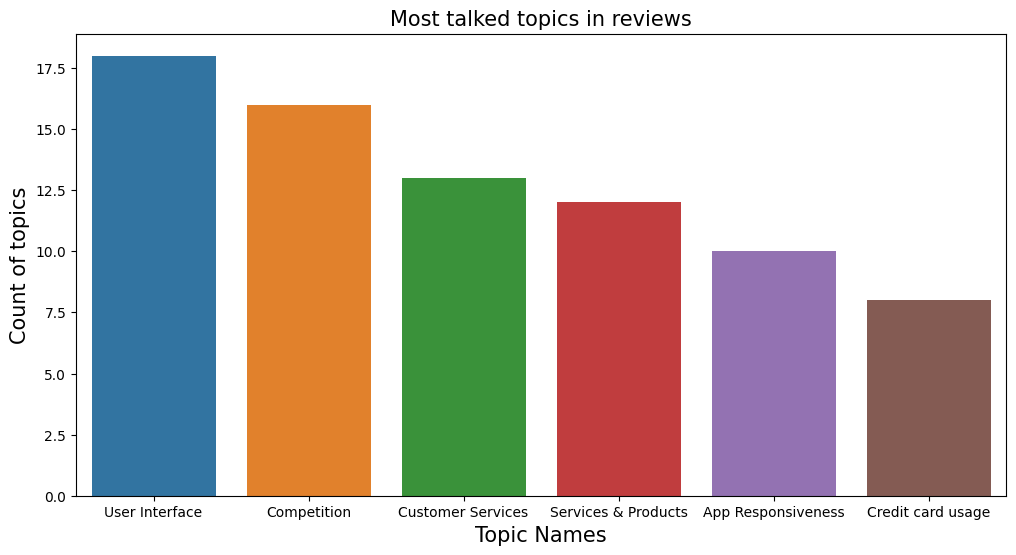

In [186]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x=review_data.Topic_Name.value_counts()[:6].index,y=review_data.Topic_Name.value_counts()[:6].values)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+50),ha = 'center', va = 'center')
plt.xlabel('Topic Names',size=15)
plt.ylabel('Count of topics',size=15)
plt.title('Most talked topics in reviews',size=15)
plt.show()

From above graph we can say that most of customers had issues with Battery of mobile

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_core.py:1225: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_core.py:1225: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_core.py:1225: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


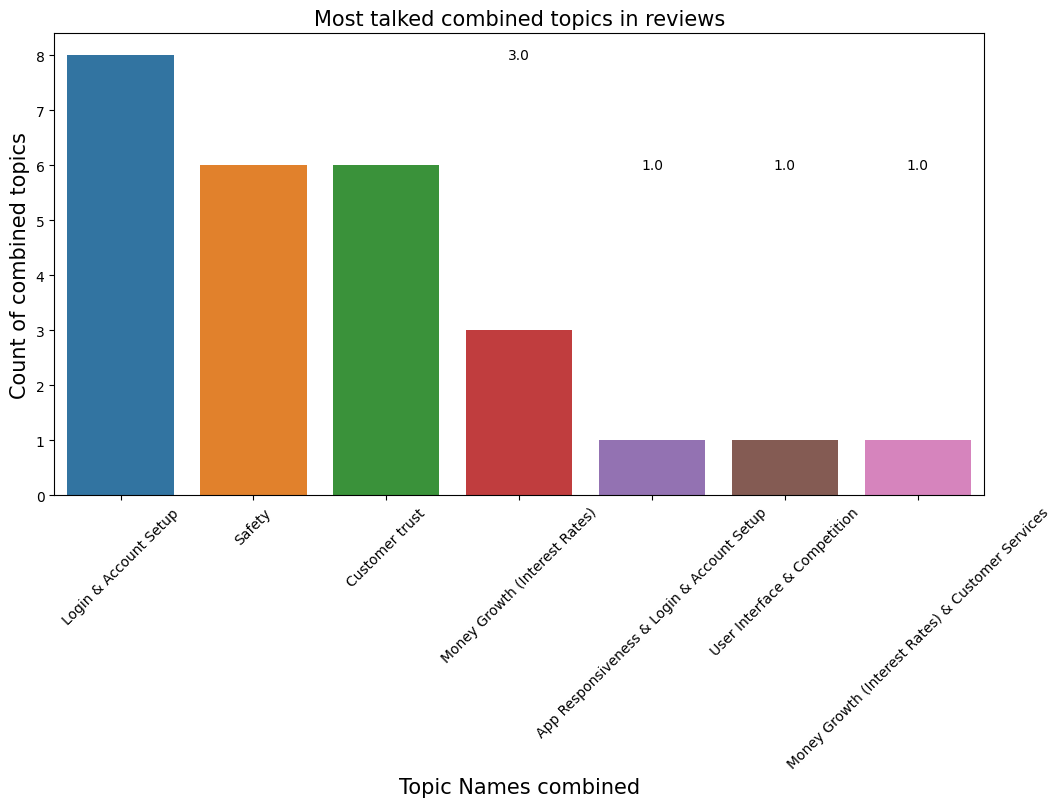

In [187]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x=review_data.Topic_Name.value_counts()[6:].index,y=review_data.Topic_Name.value_counts()[6:].values)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+5),ha = 'center', va = 'center')
plt.xlabel('Topic Names combined',size=15)
plt.ylabel('Count of combined topics',size=15)
plt.title('Most talked combined topics in reviews',size=15)
plt.xticks(rotation=45)
plt.show()

From above graph we can say that most of customers had combined issues with,

Heating issue & Battery <br>
Camera, Sound & Battery <br>
turbo charger & Battery

### Extracting reviews of 5 topic(review of battery)

In [189]:
review_data.loc[review_data.Topic_Number.str.contains('5'),['review','Topic_Name']]\
.style.set_properties(subset=['review'], **{'width': '300px'})

,review,Topic_Name
3,"Sending money into my GXS account is a breeze and instantaneous - regardless of the amounts. I’m able to immediately see that my funds are in GXS. Transferring money OUT is a huge issue. Since June I’ve had problems transferring amounts higher than $500 back to my other banking accounts, each time a red banner will pop up and said something went wrong please try again later. TODAY I can’t transfer more than $1000 back to myself - even the $1000 had to be transferred in TWO transactions of $500 each. Customer service officers did their best to help each time but it’s annoying that the advice provided (killing the app, re-logging in with SingPass) still don’t work.",Credit card usage
14,Despite a lengthy onboarding but my account got approved promptly. I like that the app is snappy and easy to use. Waiting for credit card so that I can switch to GXS as my main account.,Credit card usage
31,Like to use GXS apps that is link to Grabs apps for easy to transfer money from saving to topup Grabs account.,Credit card usage
44,"It doesn’t make the company look reputable when they offer a high interest rate only to drop it immediately after gaining enough users. It feels like a bait, which it is. They should acquire deposits through more honest and transparent methods.",Credit card usage
74,A whole new era of banking. Go GXS or go home! 💪🏼,Credit card usage
79,"Reduced interest from 3.48 to 2.68% in less than a month, kenna baited to start an account here. Have removed all my funds and closed my account.",Credit card usage
96,save ur money and grow,Credit card usage
98,"useless app. unable to join or open account, app is not open to all in sg",Credit card usage


### Conclusion

1. We can combine topic number 2 (Heating issue),3 (turbo charger), 5(Battery) <br>
2. If lenovo company improves their turbo charger which is causing heating issues in battery, the mobile will be more appreciated by users.
3. We can try to use other POS tags to improve our model.